# Vector data : interactive geometries

EOmaps can be used to assign callbacks to vektor-data (e.g. ``geopandas.GeoDataFrames``).

- to make a GeoDataFrame pickable, first use ``m.add_gdf(picker_name="MyPicker")``

    - now you can assign callbacks via ``m.cb.pick__MyPicker.attach...`` just as you
      would do with the ordinary ``m.cb.click`` or ``m.cb.pick`` callbacks

.. Note::
    For large datasets that are visualized as simple rectangles, ellipses etc.
    it is recommended to use EOmaps to visualize the data with ``m.plot_map()``
    since the generation of the plot and the identification of the picked pixels
    will be much faster!
    If the GeoDataFrame contains multiple different geometry types
    (e.g. Lines, Patches, etc.) a unique pick-collection will be assigned
    for each of the geometry types!

![image](../../../_static/example_images/example_vector_data.gif)

The data displayed in the above gif is taken from:
    - NaturalEarth (https://www.naturalearthdata.com/)

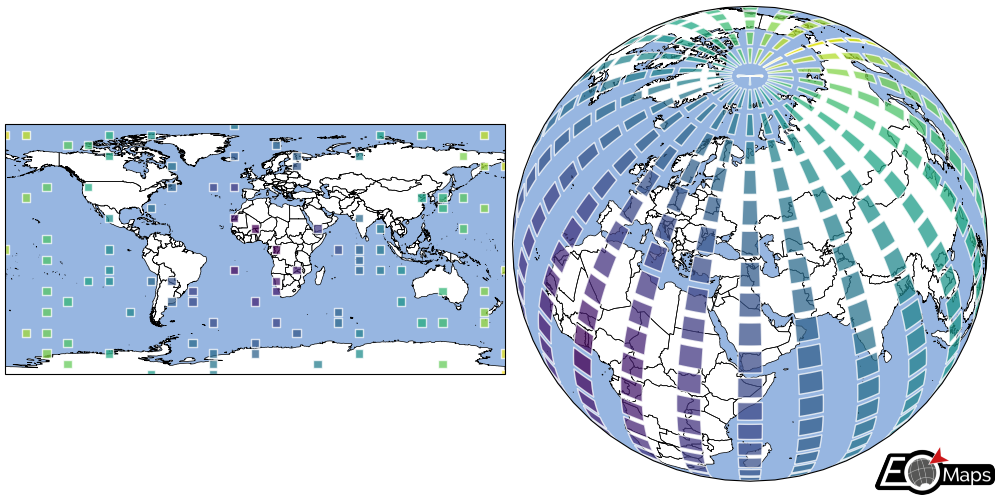

<Figure size 640x480 with 0 Axes>

In [1]:
# EOmaps example: Using geopandas - interactive shapes!

from eomaps import Maps
import pandas as pd
import numpy as np

# geopandas is used internally... the import is just here to show that!
import geopandas as gpd

# ----------- create some example-data
lon, lat = np.meshgrid(np.linspace(-180, 180, 25), np.linspace(-90, 90, 25))
data = pd.DataFrame(
    dict(lon=lon.flat, lat=lat.flat, data=np.sqrt(lon**2 + lat**2).flat)
)

# setup 2 maps with different projections next to each other
m = Maps(ax=121, crs=4326, figsize=(10, 5))
m2 = Maps(f=m.f, ax=122, crs=Maps.CRS.Orthographic(45, 45))

# assign data to the Maps objects
m.set_data(data=data.sample(100), x="lon", y="lat", crs=4326, parameter="data")
m2.set_data(data=data, x="lon", y="lat", crs=4326)

# fetch data (incl. metadata) for the "admin_0_countries" NaturalEarth feature
countries = m.add_feature.cultural.admin_0_countries.get_gdf(scale=50)

for m_i in [m, m2]:
    m_i.add_feature.preset.ocean()

    m_i.add_gdf(
        countries,
        picker_name="countries",
        pick_method="contains",
        val_key="NAME",
        fc="none",
        ec="k",
        lw=0.5,
    )

    m_i.set_shape.rectangles(radius=3, radius_crs=4326)
    m_i.plot_map(alpha=0.75, ec=(1, 1, 1, 0.5))

    # attach a callback to highlite the rectangles
    m_i.cb.pick.attach.mark(shape="rectangles", fc="none", ec="b", lw=2)

    # attach a callback to highlite the countries and indicate the names
    picker = m_i.cb.pick["countries"]
    picker.attach.highlight_geometry(fc="r", ec="k", lw=0.5, alpha=0.5)
    picker.attach.annotate(text=lambda val, **kwargs: str(val))

# share pick events between the maps-objects
m.cb.pick.share_events(m2)
m.cb.pick["countries"].share_events(m2)

m.add_logo()
m.apply_layout(
    {
        "figsize": [10.0, 5.0],
        "0_map": [0.005, 0.25114, 0.5, 0.5],
        "1_map": [0.5125, 0.0375, 0.475, 0.95],
        "2_logo": [0.875, 0.01, 0.12, 0.09901],
    }
)
m.show()